# Probability Calibration

A classification task predicts a label for a given observation based on some historical data. An alternative to predicting the class directly is to predict the probability of an observation belonging to each possible class.

Calibration curves (also known as reliability diagrams), plot the true frequency of the positive label against its predicted probability, for binned predictions. Specifically, the predicted probabilities are divided up into a fixed number of buckets along the x-axis. The number of events of positive class are counted for each bin and then these counts are normalised.

The better calibrated or more reliable a forecast, the closer the points will appear along the main diagonal from the bottom left to the top right of the plot.

Calibration of prediction probabilities is a rescaling operation that is applied after the predictions have been made by a predictive model.

Calibration of a classifier can be checked by creating a reliability diagram as demonstrated below.

## Calibration Curve

Create a dataset of 20000 samples and train multiple models on this data.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X, y = make_classification(
    n_samples=20000,
    n_features=4,
    n_informative=2,
    n_redundant=2,
    class_sep=0.7,
    random_state=0,
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0
)

svc = make_pipeline(StandardScaler(), SVC(gamma="auto", probability=True))
svc_probas = svc.fit(X_train, y_train).predict_proba(X_test)

lr = LogisticRegression()
lr_probas = lr.fit(X_train, y_train).predict_proba(X_test)

nb = GaussianNB()
nb_probas = nb.fit(X_train, y_train).predict_proba(X_test)

rf = RandomForestClassifier()
rf_probas = rf.fit(X_train, y_train).predict_proba(X_test)

Inputs for the calibration curve plot

In [2]:
probabilities = [svc_probas, rf_probas, lr_probas, nb_probas]

clf_names = [
    "Support Vector Classification",
    "Random Forest",
    "Logistic Regression",
    "Gaussian Naive Bayes",
]

Generate calibration curves from probabilities of the four models.

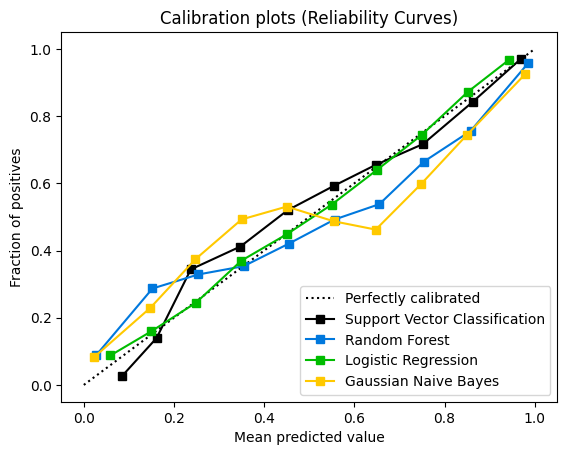

In [3]:
from sklearn_evaluation import plot

plot.CalibrationCurve.from_raw_data(y_test, probabilities, label=clf_names)

Logistic Regression returns well calibrated predictions by default. In contrast, the other methods return biased probabilities.

## Scores distribution

<Axes: title={'center': 'Gaussian Naive Bayes'}, xlabel='Mean predicted probability', ylabel='Count'>

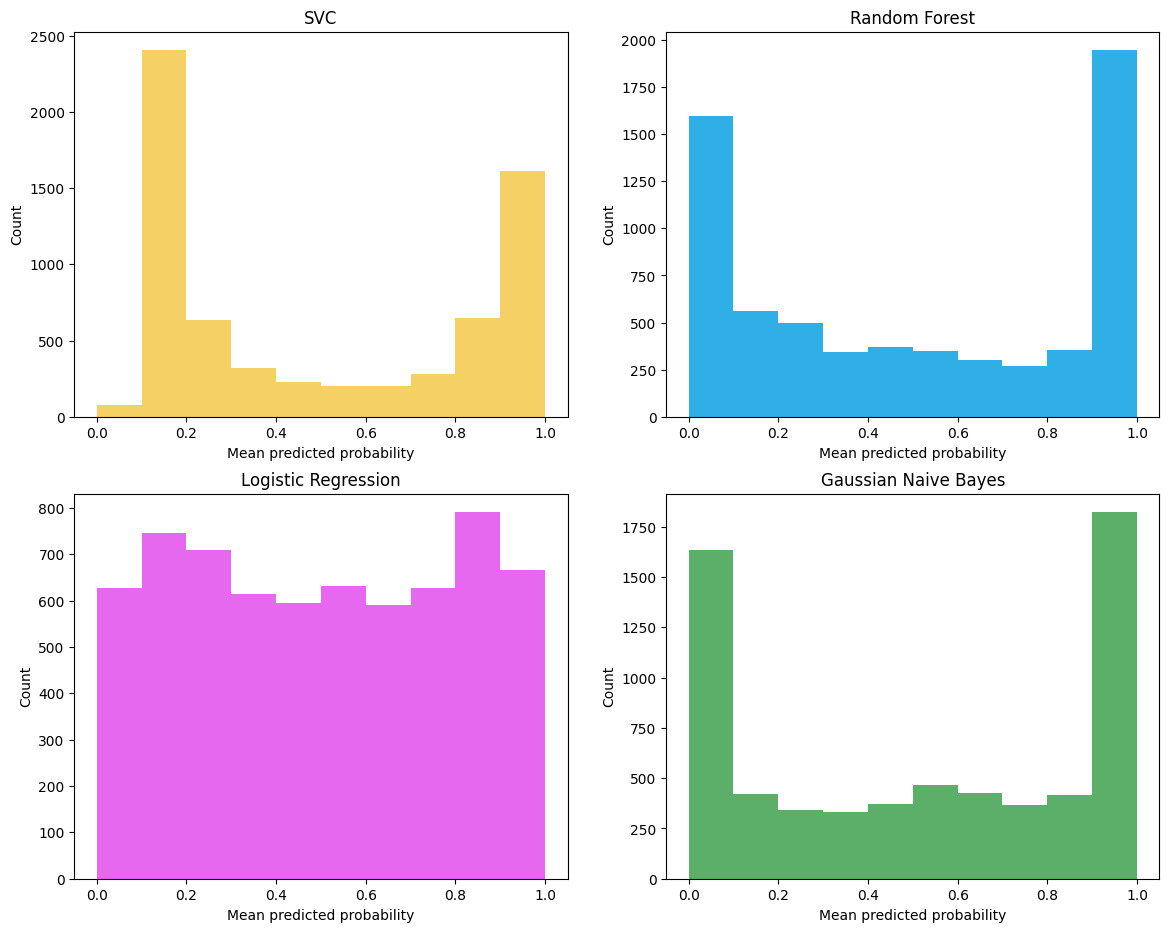

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(14, 11))
plot.scores_distribution(
    svc_probas[:, 1], n_bins=10, title="SVC", color="#F5D065", ax=axs[0, 0]
)

plot.scores_distribution(
    rf_probas[:, 1], n_bins=10, title="Random Forest", color="#30AEE6", ax=axs[0, 1]
)

plot.scores_distribution(
    lr_probas[:, 1],
    n_bins=10,
    title="Logistic Regression",
    color="#E568EE",
    ax=axs[1, 0],
)

plot.scores_distribution(
    nb_probas[:, 1],
    n_bins=10,
    title="Gaussian Naive Bayes",
    color="#5BAF69",
    ax=axs[1, 1],
)

Gaussian Naive Bayes tends to push probabilities to 0 or 1 (note the counts in the histograms). There aren't many observations in the 0.2 to 0.8 region. Logistic regression has good support all along the 0.0 to 1.0 area. SVC and Random Forest also tend to push probabilities toward 0.0 and 1.0 however support in the 0.2 to 0.8 region is better than Gaussian Naive Bayes.

Reference:

[Blog on calibration curve ](https://ploomber.io/blog/calibration-curve/)